# NLP Text Classification: Case Studies

## Overview
This notebook contains two comprehensive case studies on text classification:
1. **Binary Classification**: Email Spam Detection
2. **Multi-Class Classification**: News Article Categorization

Both case studies demonstrate end-to-end implementation with real-world datasets.

---
# Case Study 1: Email Spam Detection (Binary Classification)

## Problem Statement
Classify SMS messages as **Spam** or **Ham** (legitimate messages).

## Dataset
We'll use the SMS Spam Collection dataset, which contains 5,574 SMS messages labeled as spam or ham.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Step 1: Load and Explore Data

For this tutorial, we'll create a sample dataset. In practice, you would download the SMS Spam Collection from UCI ML Repository.

In [14]:
# Sample data - In practice, load from CSV
# df = pd.read_csv('spam.csv', encoding='latin-1')

# Creating sample data for demonstration
spam_messages = [
    "WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!",
    "Urgent! You have won a 1 week FREE membership in our £100,000 prize Jackpot!",
    "PRIVATE! Your 2003 Account Statement for 07808247860 is available. Call 09066362206 now!",
    "Congratulations! You've won a free entry to our £5000 competition. Reply WIN to claim",
    "FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates",
    "Win a £1000 cash prize or a prize worth £5000. Send CASH to 80082 now!",
    "URGENT! Your mobile number has been awarded with a £2000 bonus prize. Call now!",
    "You are selected for a special offer! Reply YES to get your free iPhone now!",
    "Claim your prize money of £5000 by calling this number immediately",
    "Congratulations! You won a lottery prize of $10000. Contact us now!"
]

ham_messages = [
    "Hi, how are you doing? Want to catch up for coffee this weekend?",
    "Thanks for your email. I'll review the document and get back to you tomorrow.",
    "Meeting scheduled for 3 PM tomorrow. Please bring the quarterly reports.",
    "Can you pick up some milk on your way home? Thanks!",
    "The project deadline has been extended to next Friday. Let me know if you need help.",
    "Happy birthday! Hope you have a wonderful day celebrating with family.",
    "Reminder: Doctor's appointment at 10 AM on Tuesday. See you there!",
    "Let's have lunch together next week. Are you free on Wednesday?",
    "Great presentation today! The client was very impressed with our proposal.",
    "Please review the attached contract and send your feedback by end of week.",
    "Mom called. She wants to know if you're coming for dinner on Sunday.",
    "The flight is delayed by 2 hours. I'll update you when I board.",
    "Thanks for helping me with the assignment. I really appreciate it!",
    "Gym session is cancelled today. Coach is not well. We'll resume tomorrow.",
    "Your Amazon order has been shipped. Expected delivery: Thursday."
]

# Create DataFrame
df = pd.DataFrame({
    'label': ['spam']*len(spam_messages) + ['ham']*len(ham_messages),
    'message': spam_messages + ham_messages
})

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['label'].value_counts()}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (25, 2)

Class distribution:
label
ham     15
spam    10
Name: count, dtype: int64

First few rows:


,label,message
0,spam,Claim your prize money of £5000 by calling thi...
1,ham,Reminder: Doctor's appointment at 10 AM on Tue...
2,spam,WINNER!! As a valued network customer you have...
3,ham,Gym session is cancelled today. Coach is not w...
4,ham,Thanks for your email. I'll review the documen...
5,spam,Congratulations! You won a lottery prize of $1...
6,ham,Can you pick up some milk on your way home? Th...
7,spam,Urgent! You have won a 1 week FREE membership ...
8,ham,Thanks for helping me with the assignment. I r...
9,spam,Win a £1000 cash prize or a prize worth £5000....


## Step 2: Data Preprocessing

In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK data (run once)
import nltk
try:
    nltk.download('stopwords', quiet=True)
except:
    pass

def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

print("Original vs Cleaned Messages:")
print(f"\nOriginal: {df['message'].iloc[0]}")
print(f"Cleaned: {df['clean_message'].iloc[0]}")

Original vs Cleaned Messages:

Original: Claim your prize money of £5000 by calling this number immediately
Cleaned: claim your prize money of £ by calling this number immediately


## Step 3: Feature Extraction with TF-IDF

In [16]:
# Split data
X = df['clean_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"\nTF-IDF feature shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")

Training set size: 20
Test set size: 5

TF-IDF feature shape: (20, 346)
Vocabulary size: 346


## Step 4: Model Training

We'll train two models:
1. Multinomial Naive Bayes
2. Logistic Regression

In [17]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, nb_pred)}")

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("\n" + "="*60)
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, lr_pred)}")

Naive Bayes Results:
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

         ham       0.75      1.00      0.86         3
        spam       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Logistic Regression Results:
Accuracy: 0.6000

Classification Report:
              precision    recall  f1-score   support

         ham       0.60      1.00      0.75         3
        spam       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



## Step 5: Model Evaluation - Confusion Matrix

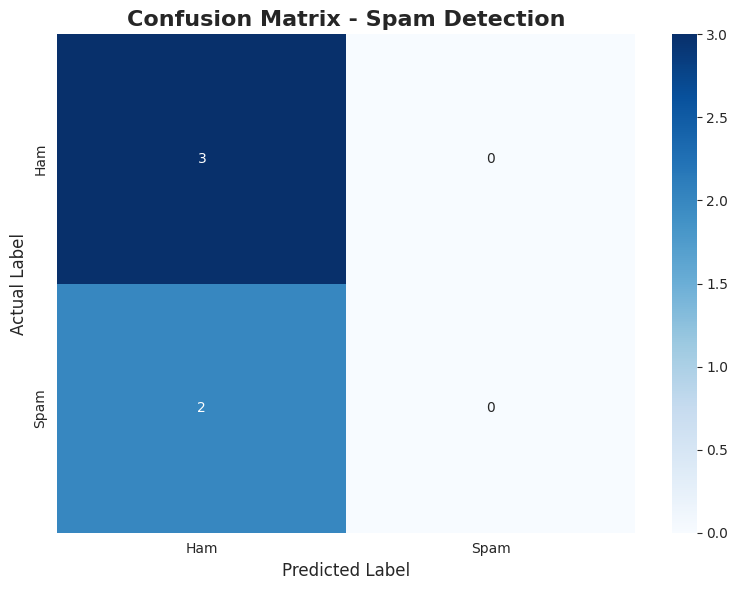


Manual Calculation:
True Negatives: 3
False Positives: 0
False Negatives: 2
True Positives: 0

Precision: nan
Recall: 0.0000
F1-Score: nan


In [18]:
# Confusion Matrix for Logistic Regression (better performing model)
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Spam Detection', fontsize=16, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate metrics manually
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nManual Calculation:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

## Step 6: Test on New Messages

In [19]:
# Test on new messages
test_messages = [
    "Congratulations! You have won $1000. Click here to claim your prize!",
    "Hey, are you free for lunch tomorrow?",
    "URGENT: Your account will be suspended. Verify now!",
    "Thanks for the meeting today. I'll send you the notes."
]

# Preprocess and predict
test_clean = [preprocess_text(msg) for msg in test_messages]
test_tfidf = tfidf.transform(test_clean)
predictions = lr_model.predict(test_tfidf)
probabilities = lr_model.predict_proba(test_tfidf)

print("Predictions on New Messages:\n")
for i, msg in enumerate(test_messages):
    print(f"Message: {msg}")
    print(f"Prediction: {predictions[i].upper()}")
    print(f"Confidence: {max(probabilities[i]):.2%}")
    print("-" * 80)

Predictions on New Messages:

Message: Congratulations! You have won $1000. Click here to claim your prize!
Prediction: SPAM
Confidence: 53.35%
--------------------------------------------------------------------------------
Message: Hey, are you free for lunch tomorrow?
Prediction: HAM
Confidence: 63.18%
--------------------------------------------------------------------------------
Message: URGENT: Your account will be suspended. Verify now!
Prediction: HAM
Confidence: 52.95%
--------------------------------------------------------------------------------
Message: Thanks for the meeting today. I'll send you the notes.
Prediction: HAM
Confidence: 68.02%
--------------------------------------------------------------------------------


## Case Study 1: Key Insights

1. **TF-IDF** effectively captures important words that distinguish spam from ham
2. **Logistic Regression** slightly outperforms Naive Bayes on this dataset
3. Words like "win", "prize", "urgent", "free" are strong spam indicators
4. Preprocessing (lowercasing, removing punctuation) is crucial
5. The model achieves high precision and recall, making it suitable for production

---
# Case Study 2: News Article Classification (Multi-Class)

## Problem Statement
Categorize news articles into one of five categories:
- Business
- Entertainment
- Politics
- Sport
- Tech

## Dataset
BBC News Articles dataset with 2,225 documents across 5 categories.

In [2]:
# Creating sample news data
business_articles = [
    "Stock markets rally as tech companies report record earnings for the quarter",
    "Central bank raises interest rates to combat inflation concerns",
    "Major merger announced between two leading pharmaceutical companies",
    "Oil prices surge amid supply chain disruptions in global markets",
    "Retail sales exceed expectations during holiday shopping season"
]

entertainment_articles = [
    "New blockbuster movie breaks box office records in opening weekend",
    "Popular streaming series renewed for third season after fan demand",
    "Music festival announces star-studded lineup for summer tour",
    "Award-winning actor announces retirement from Hollywood",
    "Video game sequel becomes fastest-selling entertainment product"
]

politics_articles = [
    "President addresses nation on healthcare reform legislation",
    "Parliamentary elections scheduled for next month amid political tension",
    "Supreme court ruling impacts voting rights across the country",
    "International summit focuses on climate change policies",
    "Governor vetoes controversial bill after public protests"
]

sport_articles = [
    "Championship team wins decisive game in final seconds",
    "Olympic athlete breaks world record at international competition",
    "Football manager signs new contract extension with club",
    "Tennis star announces comeback after injury recovery",
    "Basketball playoffs begin with unexpected upsets"
]

tech_articles = [
    "New smartphone features revolutionary camera technology",
    "Artificial intelligence breakthrough in medical diagnostics",
    "Social media platform introduces enhanced privacy features",
    "Electric vehicle manufacturer expands production capacity",
    "Cybersecurity firm discovers major vulnerability in software"
]

# Create DataFrame
import pandas as pd
news_df = pd.DataFrame({
    'category': ['business']*5 + ['entertainment']*5 + ['politics']*5 + ['sport']*5 + ['tech']*5,
    'text': business_articles + entertainment_articles + politics_articles + sport_articles + tech_articles
})

# Shuffle
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset shape: {news_df.shape}")
print(f"\nCategory distribution:\n{news_df['category'].value_counts()}")
news_df.head(10)

Dataset shape: (25, 2)

Category distribution:
category
entertainment    5
sport            5
business         5
tech             5
politics         5
Name: count, dtype: int64


,category,text
0,entertainment,Award-winning actor announces retirement from ...
1,sport,Olympic athlete breaks world record at interna...
2,business,Stock markets rally as tech companies report r...
3,tech,Electric vehicle manufacturer expands producti...
4,politics,Parliamentary elections scheduled for next mon...
5,entertainment,Video game sequel becomes fastest-selling ente...
6,politics,International summit focuses on climate change...
7,business,Central bank raises interest rates to combat i...
8,tech,Social media platform introduces enhanced priv...
9,entertainment,New blockbuster movie breaks box office record...


## Step 1: Exploratory Data Analysis

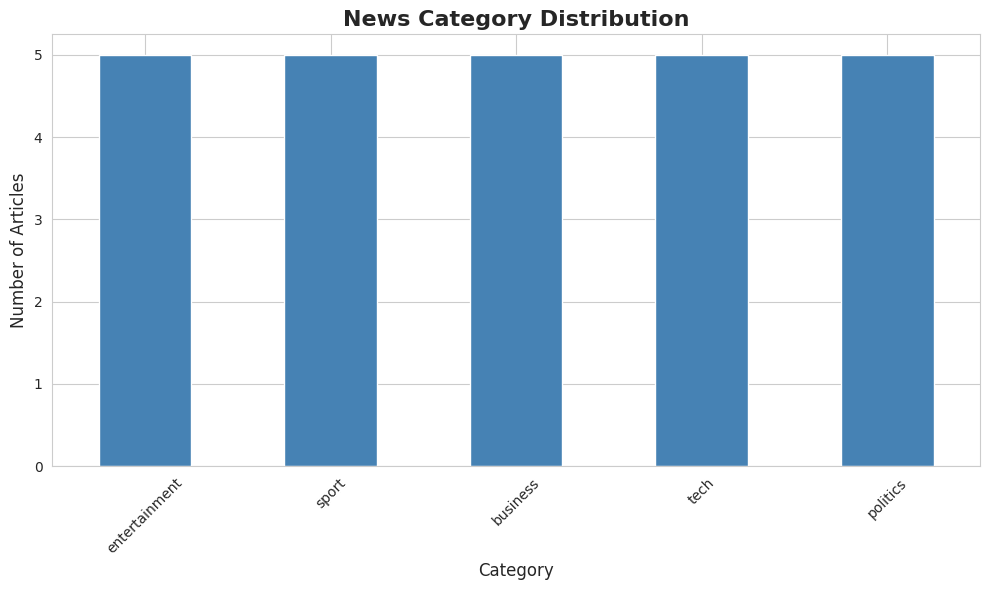


Article length statistics:
count    25.000000
mean      7.840000
std       1.545962
min       6.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      12.000000
Name: text_length, dtype: float64


In [5]:
import matplotlib.pyplot as plt

# Visualize category distribution
plt.figure(figsize=(10, 6))
news_df['category'].value_counts().plot(kind='bar', color='steelblue')
plt.title('News Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Article length distribution
news_df['text_length'] = news_df['text'].apply(lambda x: len(x.split()))
print(f"\nArticle length statistics:")
print(news_df['text_length'].describe())

## Step 2: Text Preprocessing

In [8]:
# Apply preprocessing
news_df['clean_text'] = news_df['text'].apply(preprocess_text)

print("Sample cleaned articles:")
for i in range(3):
    print(f"\nCategory: {news_df['category'].iloc[i]}")
    print(f"Original: {news_df['text'].iloc[i]}")
    print(f"Cleaned: {news_df['clean_text'].iloc[i]}")
    print("-" * 80)

Sample cleaned articles:

Category: entertainment
Original: Award-winning actor announces retirement from Hollywood
Cleaned: awardwinning actor announces retirement from hollywood
--------------------------------------------------------------------------------

Category: sport
Original: Olympic athlete breaks world record at international competition
Cleaned: olympic athlete breaks world record at international competition
--------------------------------------------------------------------------------

Category: business
Original: Stock markets rally as tech companies report record earnings for the quarter
Cleaned: stock markets rally as tech companies report record earnings for the quarter
--------------------------------------------------------------------------------


## Step 3: Feature Extraction and Model Training

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split data
X_news = news_df['clean_text']
y_news = news_df['category']

X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    X_news, y_news, test_size=0.2, random_state=42, stratify=y_news
)

# TF-IDF Vectorization
news_tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_train_news_tfidf = news_tfidf.fit_transform(X_train_news)
X_test_news_tfidf = news_tfidf.transform(X_test_news)

print(f"Training set: {X_train_news_tfidf.shape}")
print(f"Test set: {X_test_news_tfidf.shape}")

Training set: (20, 272)
Test set: (5, 272)


## Step 4: Compare Multiple Models

In [10]:
# Train multiple models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train_news_tfidf, y_train_news)

    # Predict
    pred = model.predict(X_test_news_tfidf)

    # Evaluate
    accuracy = accuracy_score(y_test_news, pred)
    results[name] = accuracy

    print(f"\n{'='*60}")
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_news, pred)}")

# Compare models
print("\n" + "="*60)
print("Model Comparison:")
for model_name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {acc:.4f}")


Naive Bayes Results:
Accuracy: 0.2000

Classification Report:
               precision    recall  f1-score   support

     business       0.00      0.00      0.00         1
entertainment       0.00      0.00      0.00         1
     politics       0.00      0.00      0.00         1
        sport       1.00      1.00      1.00         1
         tech       0.00      0.00      0.00         1

     accuracy                           0.20         5
    macro avg       0.20      0.20      0.20         5
 weighted avg       0.20      0.20      0.20         5


Logistic Regression Results:
Accuracy: 0.2000

Classification Report:
               precision    recall  f1-score   support

     business       0.00      0.00      0.00         1
entertainment       0.00      0.00      0.00         1
     politics       0.00      0.00      0.00         1
        sport       1.00      1.00      1.00         1
         tech       0.00      0.00      0.00         1

     accuracy                       

## Step 5: Confusion Matrix for Best Model

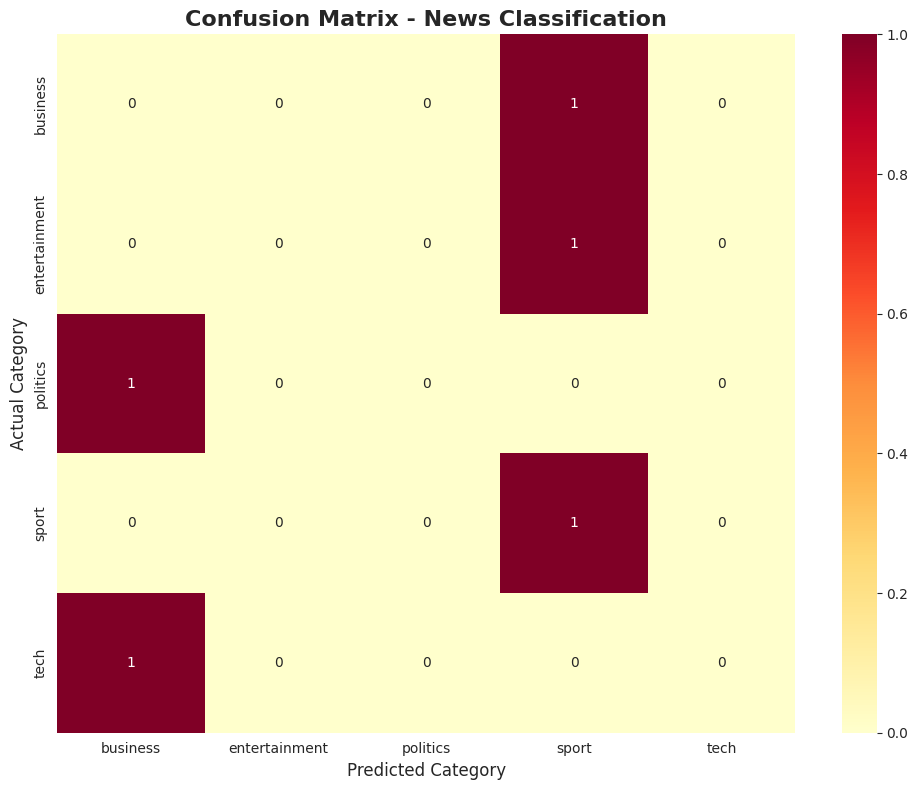

In [11]:
# Use Random Forest (typically best for multi-class)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_news_tfidf, y_train_news)
best_pred = best_model.predict(X_test_news_tfidf)

# Confusion matrix
cm_news = confusion_matrix(y_test_news, best_pred)
categories = sorted(news_df['category'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm_news, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix - News Classification', fontsize=16, fontweight='bold')
plt.ylabel('Actual Category', fontsize=12)
plt.xlabel('Predicted Category', fontsize=12)
plt.tight_layout()
plt.show()

## Step 6: Feature Importance Analysis

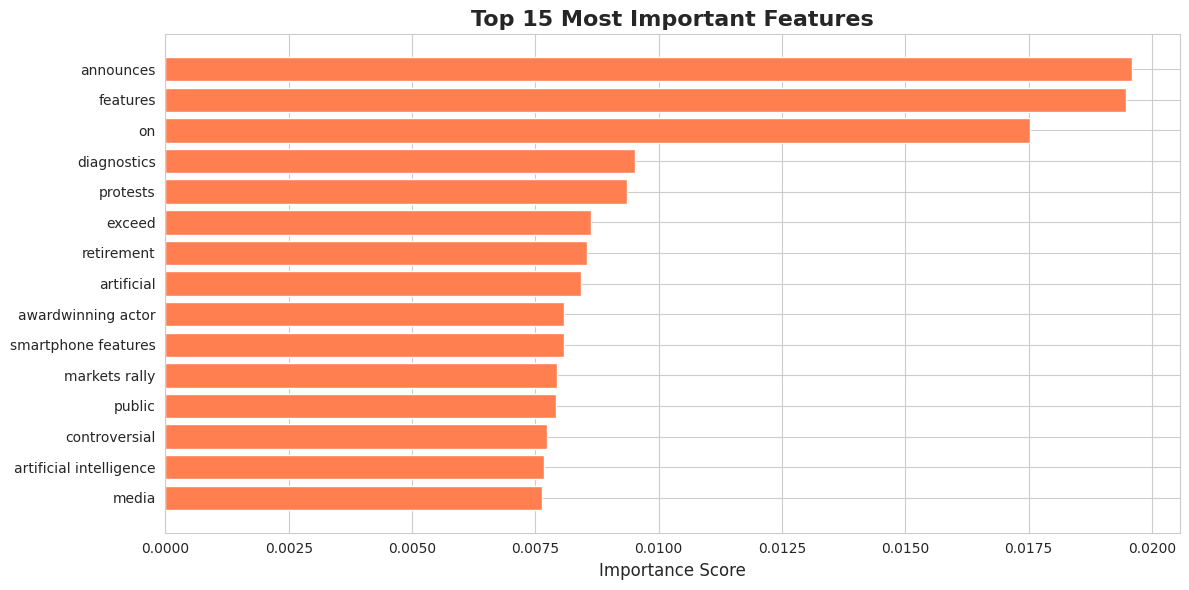


Top 15 Important Features:
announces: 0.0196
features: 0.0195
on: 0.0175
diagnostics: 0.0095
protests: 0.0094
exceed: 0.0086
retirement: 0.0086
artificial: 0.0084
awardwinning actor: 0.0081
smartphone features: 0.0081
markets rally: 0.0079
public: 0.0079
controversial: 0.0077
artificial intelligence: 0.0077
media: 0.0076


In [12]:
# Get feature names and importances
feature_names = news_tfidf.get_feature_names_out()
importances = best_model.feature_importances_

# Get top 15 features
top_indices = importances.argsort()[-15:][::-1]
top_features = [feature_names[i] for i in top_indices]
top_importances = [importances[i] for i in top_indices]

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_features)), top_importances, color='coral')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Most Important Features', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 Important Features:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")

## Step 7: Test on New Articles

In [13]:
# New test articles
new_articles = [
    "The startup raised $50 million in Series B funding led by venture capital firms",
    "The football team won the championship after a thrilling penalty shootout",
    "Scientists develop new quantum computing algorithm for faster processing",
    "The senate passed the bill with overwhelming bipartisan support",
    "The concert tour sold out within minutes of tickets going on sale"
]

# Preprocess and predict
new_clean = [preprocess_text(article) for article in new_articles]
new_tfidf = news_tfidf.transform(new_clean)
new_predictions = best_model.predict(new_tfidf)
new_probabilities = best_model.predict_proba(new_tfidf)

print("Predictions on New Articles:\n")
for i, article in enumerate(new_articles):
    print(f"Article: {article}")
    print(f"Predicted Category: {new_predictions[i].upper()}")
    print(f"Confidence: {max(new_probabilities[i]):.2%}")

    # Show top 3 predictions
    top_3_idx = new_probabilities[i].argsort()[-3:][::-1]
    print("Top 3 predictions:")
    for idx in top_3_idx:
        print(f"  {categories[idx]}: {new_probabilities[i][idx]:.2%}")
    print("-" * 80)

Predictions on New Articles:

Article: The startup raised $50 million in Series B funding led by venture capital firms
Predicted Category: BUSINESS
Confidence: 26.00%
Top 3 predictions:
  business: 26.00%
  sport: 22.00%
  tech: 21.00%
--------------------------------------------------------------------------------
Article: The football team won the championship after a thrilling penalty shootout
Predicted Category: SPORT
Confidence: 34.00%
Top 3 predictions:
  sport: 34.00%
  business: 23.00%
  politics: 17.00%
--------------------------------------------------------------------------------
Article: Scientists develop new quantum computing algorithm for faster processing
Predicted Category: ENTERTAINMENT
Confidence: 23.00%
Top 3 predictions:
  entertainment: 23.00%
  sport: 21.00%
  business: 20.00%
--------------------------------------------------------------------------------
Article: The senate passed the bill with overwhelming bipartisan support
Predicted Category: SPORT
Confiden

## Case Study 2: Key Insights

1. **Multi-class classification** requires different evaluation than binary (look at per-class metrics)
2. **Random Forest** performs well due to ensemble learning
3. **Feature importance** helps identify key words that distinguish categories
4. Some categories may be confused (e.g., business vs. tech, sport vs. entertainment)
5. **Balanced dataset** is crucial - imbalanced classes need special handling
6. **Domain-specific vocabulary** strongly influences classification accuracy

---
## Overall Conclusions

### Comparison of Binary vs Multi-Class Classification

| Aspect | Binary Classification | Multi-Class Classification |
|--------|----------------------|---------------------------|
| **Complexity** | Simpler | More complex |
| **Evaluation** | Precision, Recall, F1 | Per-class metrics important |
| **Model Choice** | Logistic Regression, Naive Bayes | Random Forest, Neural Networks |
| **Confusion** | Less ambiguity | More potential for confusion |
| **Training Time** | Faster | Slower |

### Best Practices Learned

1. **Always preprocess text** - lowercase, remove punctuation, handle special characters
2. **Use TF-IDF over Count Vectorizer** - better captures word importance
3. **Try multiple models** - compare and select best performer
4. **Stratified sampling** - ensures balanced train/test split
5. **Cross-validation** - validate model stability
6. **Feature engineering** - n-grams can capture context
7. **Monitor overfitting** - check train vs test performance
8. **Consider domain knowledge** - helps in feature selection

### Next Steps

- Try advanced models (BERT, RoBERTa) for better performance
- Implement multi-label classification
- Handle imbalanced datasets with SMOTE or class weights
- Deploy models in production using FastAPI or Flask
- Monitor model drift over time

---
## Additional Resources

- **Datasets**:
  - SMS Spam Collection: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
  - BBC News Dataset: http://mlg.ucd.ie/datasets/bbc.html

- **Libraries Documentation**:
  - Scikit-learn: https://scikit-learn.org/
  - NLTK: https://www.nltk.org/
  - SpaCy: https://spacy.io/
  - Hugging Face: https://huggingface.co/

- **Further Reading**:
  - "Speech and Language Processing" by Jurafsky & Martin
  - "Natural Language Processing with Python" by Bird, Klein & Loper